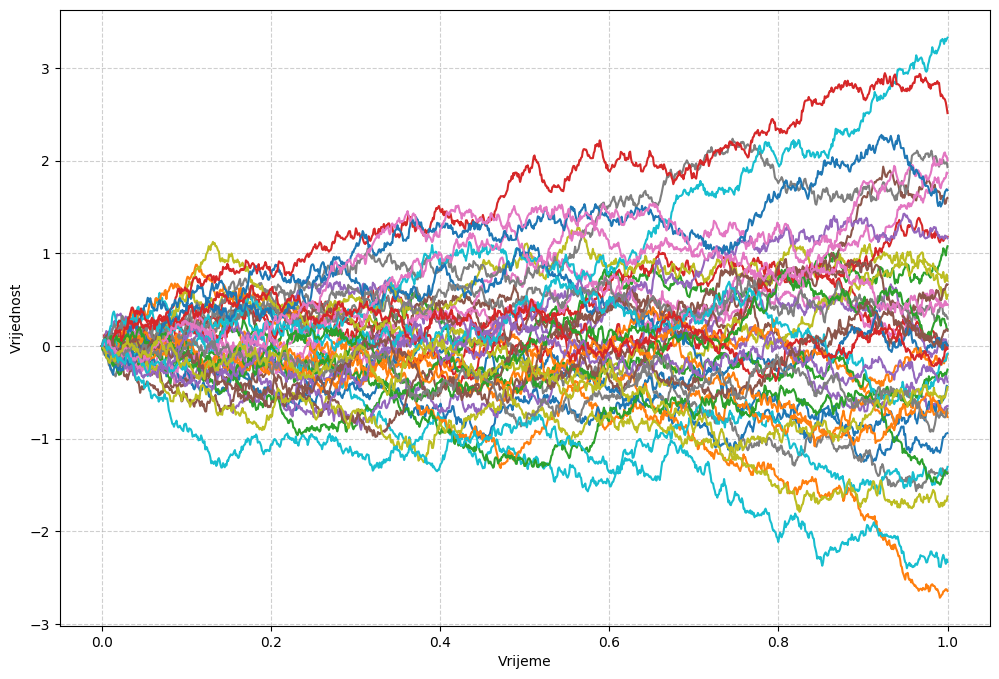

Kovarijansa: 0.26595
Korelacija: 0.88843


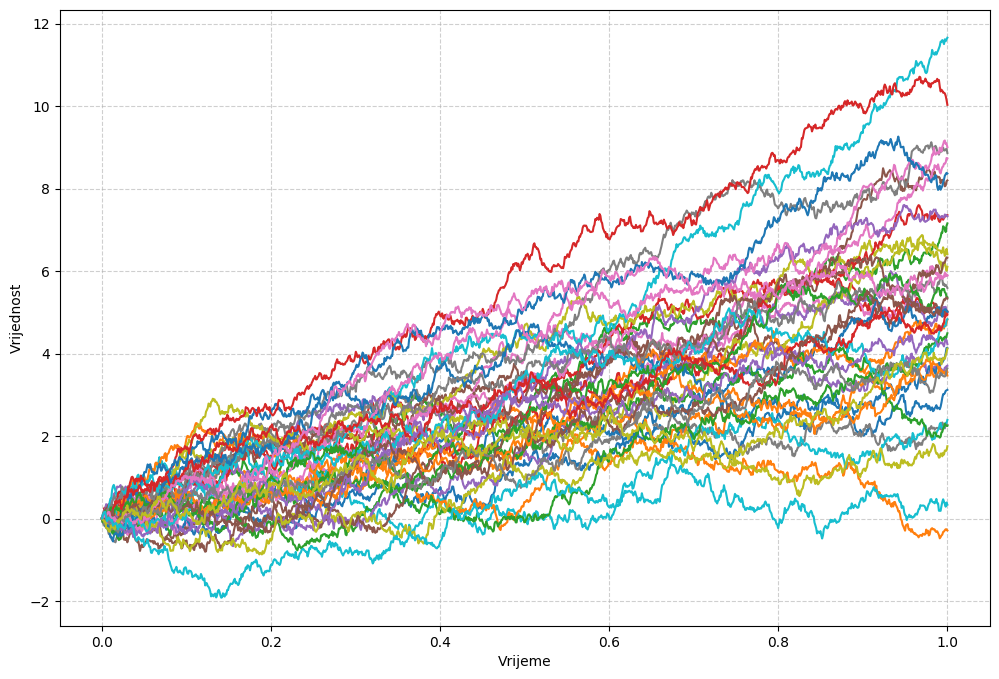

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

rng = np.random.default_rng(42)

points = 1000
paths = 40

mu, sigma = 0.0, 1.0
Z = rng.normal(mu, sigma, (paths, points))

interval = [0.0, 1.0]
dt = (interval[1] - interval[0]) / (points - 1)
t_axis = np.linspace(interval[0], interval[1], points)

# 3.2 [Glasserman, 2003]
W = np.zeros((paths, points))
for idx in range(points - 1):
    real_idx = idx + 1
    W[:, real_idx] = W[:, real_idx - 1] + np.sqrt(dt) * Z[:, idx]

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, W[path, :])
ax.set_xlabel("Vrijeme")
ax.set_ylabel("Vrijednost")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

covariance = np.cov(W[0, :], W[1, :])[0, 1]
correlation = np.corrcoef(W[0, :], W[1, :])[0, 1]

print(f"Kovarijansa: {covariance:.5f}")
print(f"Korelacija: {correlation:.5f}")

mu_c, sigma_c = 5.0, 2.0

# 3.3 from [Glasserman, 2003] =
X = np.zeros((paths, points))
for idx in range(points - 1):
    real_idx = idx + 1
    X[:, real_idx] = X[:, real_idx - 1] + mu_c * dt + sigma_c * np.sqrt(dt) * Z[:, idx]

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, X[path, :])
ax.set_xlabel("Vrijeme")
ax.set_ylabel("Vrijednost")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()